Importing libraries 

In [61]:
import pandas as pd
import  plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

Opening dataset

In [62]:
df = pd.read_csv('../vehicles_us.csv')

Data exploration

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [64]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [65]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Data cleanup

In [66]:
fill_empties = ['is_4wd', 'cylinders', 'model_year', 'odometer']
for n in fill_empties:
    df[n] = df[n].fillna(0)
    df[n] = df [n].astype(int)

df["paint_color"] = df["paint_color"].fillna("unknown")    

In [67]:
def cylinder_fill(row):
    if row["cylinders"] == 0:
        cylinder = df.loc[df["model"] == row["model"]].loc[df["model_year"]== row["model_year"]]["cylinders"].unique()
        for c in range(len(cylinder)):
            if cylinder[c] != 0:
                return cylinder[c]
    return row["cylinders"]


df["cylinders"]= df.apply(cylinder_fill, axis=1)

In [68]:
def odometer_fill(row):
    if row["odometer"] == 0:
        odometer = df.loc[df["model"] == row["model"]].loc[df["model_year"] == row["model_year"]].loc[df["type"] == row["type"]]["odometer"].unique()
        for o in range(len(odometer)):
            if odometer[o] != 0:
                return odometer[o]
    return row["odometer"]

df["odometer"] = df.apply(odometer_fill, axis=1)

In [69]:
def model_man_year(row):
    if row["model_year"] == 0:
        model_year = df.loc[df["model"] == row["model"]].loc[df["type"] == row["type"]]["model_year"].unique()
        for i in range(len(model_year)):
            if model_year[i] != 0:
                return model_year[i]
    return row["model_year"]

df["model_year"] = df.apply(model_man_year, axis=1)

In [70]:
def colour_check(row):
    if row["paint_color"] == "unknown":
        paint_color = df.loc[df["model"] == row["model"]]["paint_color"].unique()
        for i in range(len(paint_color)):
            if paint_color[i] != "unknown":
                return paint_color[i]
    return row["paint_color"]

df["paint_color"] = df.apply(colour_check, axis=1)

In [71]:
df["manufacturer"] = df["model"].str.split(" ", n = 1, expand = True)[0]

In [72]:
df["model_name"] = df["model"].str.split(" ", n = 1, expand = True)[1]

In [73]:
df.drop(columns=["model"], inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   condition     51525 non-null  object
 3   cylinders     51525 non-null  int64 
 4   fuel          51525 non-null  object
 5   odometer      51525 non-null  int64 
 6   transmission  51525 non-null  object
 7   type          51525 non-null  object
 8   paint_color   51525 non-null  object
 9   is_4wd        51525 non-null  int32 
 10  date_posted   51525 non-null  object
 11  days_listed   51525 non-null  int64 
 12  manufacturer  51525 non-null  object
 13  model_name    51525 non-null  object
dtypes: int32(1), int64(5), object(8)
memory usage: 5.3+ MB


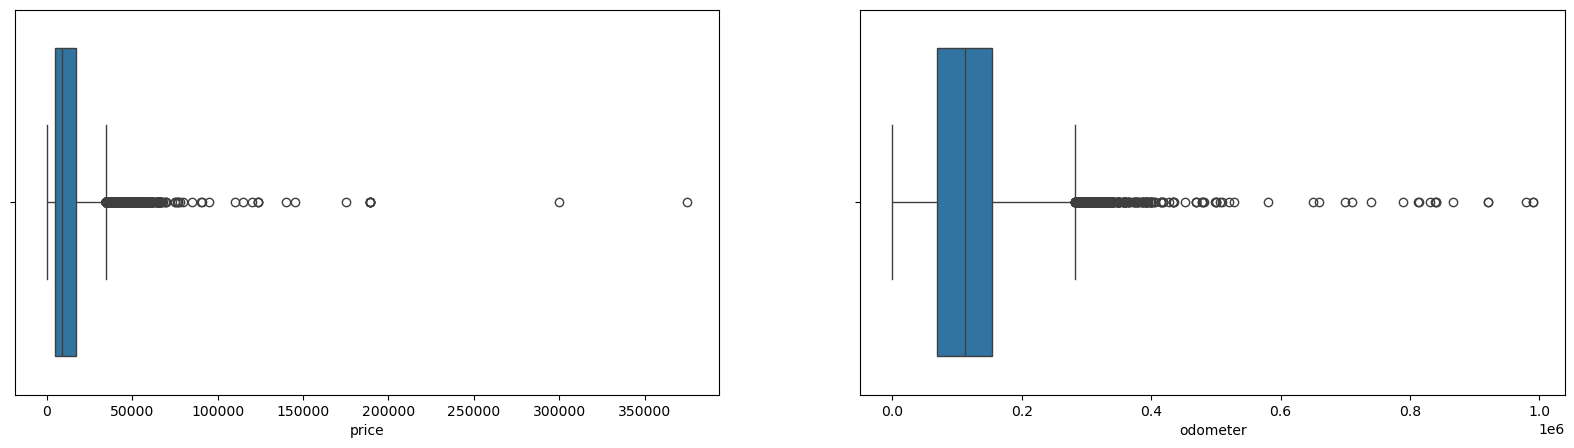

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df["price"], ax=ax[0])
sns.boxplot(x=df["odometer"], ax=ax[1])
plt.show()


In [76]:
df["date_posted"] = pd.to_datetime(df["date_posted"], format = '%Y-%m-%d')

In [77]:
df.head(10)

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,model_name
0,9400,2011,good,6,gas,145000,automatic,SUV,black,1,2018-06-23,19,bmw,x5
1,25500,2003,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,ford,f-150
2,5500,2013,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,hyundai,sonata
3,1500,2003,fair,8,gas,99000,automatic,pickup,white,0,2019-03-22,9,ford,f-150
4,14900,2017,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,chrysler,200
5,14990,2014,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,chrysler,300
6,12990,2015,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,toyota,camry
7,15990,2013,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,honda,pilot
8,11500,2012,excellent,4,gas,104174,automatic,SUV,brown,1,2018-07-16,19,kia,sorento
9,9200,2008,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,honda,pilot


In [78]:
df.to_csv('../cleaned_vehicles_us.csv')